In [221]:
import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm #progress of your code when run it
import matplotlib.pyplot as plt
#Deep learning:
#from tensorflow.python.keras.modelsimport Input
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
#from keras.modelsimport Input, Model
from scipy import sparse

In [222]:
texts = pd.read_csv('aa.csv')
texts = [x for x in texts['text']]
print (len(texts))
print (texts)

3
["'Machine learning is the study of computer algorithms that improve automatically through experience.\\", 'Machine learning algorithms build a mathematical model based on sample data, known as training data.\\', "Software engineering is a computing discipline.',"]


In [223]:
def text_preprocessing(
        text: list,
        punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
        stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will', 'was', 'but', 'this', 'were', 'with', 'of', 'also',
                    'on', '.', 'for', 'any', 'its', 'and', 'are', 'from', 'both', 'as']
) -> list:
    """
    A method to preproces text
    """
    #Make all small chars
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the white spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x != '']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text


In [224]:
# Defining the window for context
window = 2
# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []
for text in texts:
    # Cleaning the text
    text = text_preprocessing(text)
    # print (text)
    # Appending to the all text list
    all_text += text

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text):
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

In [225]:
word_lists

[['machine', 'learning'],
 ['machine', 'study'],
 ['learning', 'study'],
 ['learning', 'machine'],
 ['learning', 'computer'],
 ['study', 'computer'],
 ['study', 'learning'],
 ['study', 'algorithms'],
 ['study', 'machine'],
 ['computer', 'algorithms'],
 ['computer', 'study'],
 ['computer', 'that'],
 ['computer', 'learning'],
 ['algorithms', 'that'],
 ['algorithms', 'computer'],
 ['algorithms', 'improve'],
 ['algorithms', 'study'],
 ['that', 'improve'],
 ['that', 'algorithms'],
 ['that', 'automatically'],
 ['that', 'computer'],
 ['improve', 'automatically'],
 ['improve', 'that'],
 ['improve', 'through'],
 ['improve', 'algorithms'],
 ['automatically', 'through'],
 ['automatically', 'improve'],
 ['automatically', 'experience'],
 ['automatically', 'that'],
 ['through', 'experience'],
 ['through', 'automatically'],
 ['through', 'improve'],
 ['experience', 'through'],
 ['experience', 'automatically'],
 ['machine', 'learning'],
 ['machine', 'algorithms'],
 ['learning', 'algorithms'],
 ['learni

In [226]:
def create_unique_word_dict(text: list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict1 = {}
    for i, word in enumerate(words):
        unique_word_dict1.update({
            word: i
        })

    return unique_word_dict1


In [227]:
unique_word_dict1 = create_unique_word_dict(all_text)
# Defining the number of features (unique words)
n_words = len(unique_word_dict1)
print(unique_word_dict1)

{'algorithms': 0, 'automatically': 1, 'based': 2, 'build': 3, 'computer': 4, 'computing': 5, 'data': 6, 'discipline': 7, 'engineering': 8, 'experience': 9, 'improve': 10, 'known': 11, 'learning': 12, 'machine': 13, 'mathematical': 14, 'model': 15, 'sample': 16, 'software': 17, 'study': 18, 'that': 19, 'through': 20, 'training': 21}


In [228]:
# Getting all the unique words
words = list(unique_word_dict1.keys())
print(words)

['algorithms', 'automatically', 'based', 'build', 'computer', 'computing', 'data', 'discipline', 'engineering', 'experience', 'improve', 'known', 'learning', 'machine', 'mathematical', 'model', 'sample', 'software', 'study', 'that', 'through', 'training']


In [229]:
# Creating the X and Y matrices using one hot encoding
print(n_words)

22


In [230]:
X = []
Y = []
for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    print(word_list)
    main_word_index = unique_word_dict1.get(word_list[0])
    context_word_index = unique_word_dict1.get(word_list[1])
    # print (word_list)
    print(word_list[0], main_word_index)
    print(word_list[1], context_word_index)

    # Creating the placeholders
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)


86it [00:00, 21144.86it/s]

['machine', 'learning']
machine 13
learning 12
['machine', 'study']
machine 13
study 18
['learning', 'study']
learning 12
study 18
['learning', 'machine']
learning 12
machine 13
['learning', 'computer']
learning 12
computer 4
['study', 'computer']
study 18
computer 4
['study', 'learning']
study 18
learning 12
['study', 'algorithms']
study 18
algorithms 0
['study', 'machine']
study 18
machine 13
['computer', 'algorithms']
computer 4
algorithms 0
['computer', 'study']
computer 4
study 18
['computer', 'that']
computer 4
that 19
['computer', 'learning']
computer 4
learning 12
['algorithms', 'that']
algorithms 0
that 19
['algorithms', 'computer']
algorithms 0
computer 4
['algorithms', 'improve']
algorithms 0
improve 10
['algorithms', 'study']
algorithms 0
study 18
['that', 'improve']
that 19
improve 10
['that', 'algorithms']
that 19
algorithms 0
['that', 'automatically']
that 19
automatically 1
['that', 'computer']
that 19
computer 4
['improve', 'automatically']
improve 10
automatically 1
[

In [231]:
# Converting the matrices into a sparse format because the vast majority of the data are 0s
print(X)
print(Y)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [232]:
import tensorflow as tf

# X= sparse.csr_matrix(X)
# Y = sparse.csr_matrix(Y)
# print (X)
# print(X[0, :].toarray())
# print (X.todense())
# a = X.todense()
# print (a[0])
XX = tf.convert_to_tensor(X, dtype=tf.float32)
YY = tf.convert_to_tensor(Y, dtype=tf.float32)
print(XX.shape)
print(YY.shape)

(86, 22)
(86, 22)


In [233]:
def CreateModel():
    # Defining the size of the embedding
    embed_size = 2
    # Defining the neural network

    # inp = Input(shape=(X.shape[1],))
    inp = Input(shape=XX.shape[1])  # 21
    x = Dense(units=embed_size, activation='linear')(inp)
    # x = Dense(units=21, activation='softmax')(x)
    x = Dense(units=YY.shape[1], activation='softmax')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.summary()
    return model


In [234]:
model = CreateModel()
# Optimizing the network weights
model.fit(
    x=XX,
    y=YY,
    batch_size=10,
    epochs=2000
)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 22)]              0         
                                                                 
 dense_18 (Dense)            (None, 2)                 46        
                                                                 
 dense_19 (Dense)            (None, 22)                66        
                                                                 
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
9/9 [==============================] - 0s 3ms/step - loss: 3.1095
Epoch 2/2000
9/9 [==============================] - 0s 0s/step - loss: 3.1059
Epoch 3/2000
9/9 [==============================] - 0s 2ms/step - loss: 3.1035
Epoch 4/2000
9/9 [==============================] - 0s 1ms/step - loss: 3.1012
Epoch 5/20

9/9 [==============================] - 0s 2ms/step - loss: 2.8377
Epoch 94/2000
9/9 [==============================] - 0s 0s/step - loss: 2.8334
Epoch 95/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.8287
Epoch 96/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.8241
Epoch 97/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.8194
Epoch 98/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.8149
Epoch 99/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.8099
Epoch 100/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.8055
Epoch 101/2000
9/9 [==============================] - 0s 0s/step - loss: 2.8007
Epoch 102/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.7960
Epoch 103/2000
9/9 [==============================] - 0s 524us/step - loss: 2.7913
Epoch 104/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.7865
Epoch 105/2000
9/9 [=============================

9/9 [==============================] - 0s 2ms/step - loss: 2.3985
Epoch 194/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.3948
Epoch 195/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.3916
Epoch 196/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.3881
Epoch 197/2000
9/9 [==============================] - 0s 0s/step - loss: 2.3851
Epoch 198/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.3816
Epoch 199/2000
9/9 [==============================] - 0s 145us/step - loss: 2.3782
Epoch 200/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.3753
Epoch 201/2000
9/9 [==============================] - 0s 431us/step - loss: 2.3718
Epoch 202/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.3685
Epoch 203/2000
9/9 [==============================] - 0s 517us/step - loss: 2.3654
Epoch 204/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.3621
Epoch 205/2000
9/9 [==================

9/9 [==============================] - 0s 2ms/step - loss: 2.1568
Epoch 295/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.1548
Epoch 296/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.1537
Epoch 297/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.1518
Epoch 298/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.1500
Epoch 299/2000
9/9 [==============================] - 0s 0s/step - loss: 2.1485
Epoch 300/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.1470
Epoch 301/2000
9/9 [==============================] - 0s 702us/step - loss: 2.1454
Epoch 302/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.1438
Epoch 303/2000
9/9 [==============================] - 0s 143us/step - loss: 2.1423
Epoch 304/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.1409
Epoch 305/2000
9/9 [==============================] - 0s 392us/step - loss: 2.1394
Epoch 306/2000
9/9 [==================

9/9 [==============================] - 0s 442us/step - loss: 2.0359
Epoch 395/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0351
Epoch 396/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0341
Epoch 397/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.0331
Epoch 398/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.0322
Epoch 399/2000
9/9 [==============================] - 0s 199us/step - loss: 2.0314
Epoch 400/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0304
Epoch 401/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.0294
Epoch 402/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.0287
Epoch 403/2000
9/9 [==============================] - 0s 130us/step - loss: 2.0277
Epoch 404/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0267
Epoch 405/2000
9/9 [==============================] - 0s 586us/step - loss: 2.0261
Epoch 406/2000
9/9 [===============

9/9 [==============================] - 0s 1ms/step - loss: 1.9595
Epoch 495/2000
9/9 [==============================] - 0s 394us/step - loss: 1.9590
Epoch 496/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.9583
Epoch 497/2000
9/9 [==============================] - 0s 445us/step - loss: 1.9579
Epoch 498/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.9569
Epoch 499/2000
9/9 [==============================] - 0s 315us/step - loss: 1.9566
Epoch 500/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.9556
Epoch 501/2000
9/9 [==============================] - 0s 139us/step - loss: 1.9552
Epoch 502/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.9543
Epoch 503/2000
9/9 [==============================] - 0s 327us/step - loss: 1.9540
Epoch 504/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9534
Epoch 505/2000
9/9 [==============================] - 0s 0s/step - loss: 1.9525
Epoch 506/2000
9/9 [==============

9/9 [==============================] - 0s 0s/step - loss: 1.9038
Epoch 595/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.9032
Epoch 596/2000
9/9 [==============================] - 0s 413us/step - loss: 1.9027
Epoch 597/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.9022
Epoch 598/2000
9/9 [==============================] - 0s 0s/step - loss: 1.9018
Epoch 599/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9016
Epoch 600/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9010
Epoch 601/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9003
Epoch 602/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9002
Epoch 603/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.8994
Epoch 604/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.8991
Epoch 605/2000
9/9 [==============================] - 0s 0s/step - loss: 1.8984
Epoch 606/2000
9/9 [========================

9/9 [==============================] - 0s 328us/step - loss: 1.8607
Epoch 695/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.8602
Epoch 696/2000
9/9 [==============================] - 0s 428us/step - loss: 1.8599
Epoch 697/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8596
Epoch 698/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.8591
Epoch 699/2000
9/9 [==============================] - 0s 638us/step - loss: 1.8586
Epoch 700/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8584
Epoch 701/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.8582
Epoch 702/2000
9/9 [==============================] - 0s 506us/step - loss: 1.8576
Epoch 703/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8571
Epoch 704/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.8571
Epoch 705/2000
9/9 [==============================] - 0s 379us/step - loss: 1.8565
Epoch 706/2000
9/9 [=============

9/9 [==============================] - 0s 0s/step - loss: 1.8263
Epoch 795/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8260
Epoch 796/2000
9/9 [==============================] - 0s 0s/step - loss: 1.8258
Epoch 797/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.8256
Epoch 798/2000
9/9 [==============================] - 0s 521us/step - loss: 1.8253
Epoch 799/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.8249
Epoch 800/2000
9/9 [==============================] - 0s 170us/step - loss: 1.8246
Epoch 801/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8245
Epoch 802/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.8242
Epoch 803/2000
9/9 [==============================] - 0s 882us/step - loss: 1.8236
Epoch 804/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.8236
Epoch 805/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8231
Epoch 806/2000
9/9 [===================

9/9 [==============================] - 0s 0s/step - loss: 1.7994
Epoch 895/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7988
Epoch 896/2000
9/9 [==============================] - 0s 0s/step - loss: 1.7987
Epoch 897/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7984
Epoch 898/2000
9/9 [==============================] - 0s 0s/step - loss: 1.7981
Epoch 899/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7979
Epoch 900/2000
9/9 [==============================] - 0s 389us/step - loss: 1.7978
Epoch 901/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7973
Epoch 902/2000
9/9 [==============================] - 0s 136us/step - loss: 1.7972
Epoch 903/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7970
Epoch 904/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7969
Epoch 905/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7963
Epoch 906/2000
9/9 [======================

9/9 [==============================] - 0s 2ms/step - loss: 1.7777
Epoch 995/2000
9/9 [==============================] - 0s 625us/step - loss: 1.7772
Epoch 996/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7770
Epoch 997/2000
9/9 [==============================] - 0s 590us/step - loss: 1.7772
Epoch 998/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7767
Epoch 999/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7764
Epoch 1000/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7764
Epoch 1001/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7762
Epoch 1002/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7760
Epoch 1003/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7759
Epoch 1004/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7754
Epoch 1005/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7754
Epoch 1006/2000
9/9 [============

9/9 [==============================] - 0s 3ms/step - loss: 1.7605
Epoch 1094/2000
9/9 [==============================] - 0s 517us/step - loss: 1.7600
Epoch 1095/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7600
Epoch 1096/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7599
Epoch 1097/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7598
Epoch 1098/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7595
Epoch 1099/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7594
Epoch 1100/2000
9/9 [==============================] - 0s 0s/step - loss: 1.7592
Epoch 1101/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7591
Epoch 1102/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7591
Epoch 1103/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7588
Epoch 1104/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7587
Epoch 1105/2000
9/9 [==========

9/9 [==============================] - 0s 2ms/step - loss: 1.7464
Epoch 1193/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7459
Epoch 1194/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7460
Epoch 1195/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7462
Epoch 1196/2000
9/9 [==============================] - 0s 668us/step - loss: 1.7458
Epoch 1197/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7459
Epoch 1198/2000
9/9 [==============================] - 0s 0s/step - loss: 1.7455
Epoch 1199/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7452
Epoch 1200/2000
9/9 [==============================] - 0s 252us/step - loss: 1.7451
Epoch 1201/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7452
Epoch 1202/2000
9/9 [==============================] - 0s 423us/step - loss: 1.7449
Epoch 1203/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7447
Epoch 1204/2000
9/9 [======

9/9 [==============================] - 0s 3ms/step - loss: 1.7348
Epoch 1292/2000
9/9 [==============================] - 0s 885us/step - loss: 1.7348
Epoch 1293/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7347
Epoch 1294/2000
9/9 [==============================] - 0s 693us/step - loss: 1.7343
Epoch 1295/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7343
Epoch 1296/2000
9/9 [==============================] - 0s 131us/step - loss: 1.7339
Epoch 1297/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7345
Epoch 1298/2000
9/9 [==============================] - 0s 0s/step - loss: 1.7338
Epoch 1299/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7336
Epoch 1300/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7337
Epoch 1301/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7335
Epoch 1302/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7333
Epoch 1303/2000
9/9 [======

9/9 [==============================] - 0s 1ms/step - loss: 1.7245
Epoch 1391/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7246
Epoch 1392/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7245
Epoch 1393/2000
9/9 [==============================] - 0s 597us/step - loss: 1.7243
Epoch 1394/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7240
Epoch 1395/2000
9/9 [==============================] - 0s 0s/step - loss: 1.7245
Epoch 1396/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7240
Epoch 1397/2000
9/9 [==============================] - 0s 152us/step - loss: 1.7241
Epoch 1398/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7235
Epoch 1399/2000
9/9 [==============================] - 0s 350us/step - loss: 1.7240
Epoch 1400/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7238
Epoch 1401/2000
9/9 [==============================] - 0s 615us/step - loss: 1.7237
Epoch 1402/2000
9/9 [====

9/9 [==============================] - 0s 2ms/step - loss: 1.7159
Epoch 1490/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7160
Epoch 1491/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7160
Epoch 1492/2000
9/9 [==============================] - 0s 302us/step - loss: 1.7157
Epoch 1493/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7157
Epoch 1494/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7155
Epoch 1495/2000
9/9 [==============================] - 0s 549us/step - loss: 1.7154
Epoch 1496/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7154
Epoch 1497/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7151
Epoch 1498/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7150
Epoch 1499/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7154
Epoch 1500/2000
9/9 [==============================] - 0s 641us/step - loss: 1.7151
Epoch 1501/2000
9/9 [=====

9/9 [==============================] - 0s 687us/step - loss: 1.7081
Epoch 1589/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7082
Epoch 1590/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7078
Epoch 1591/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7078
Epoch 1592/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7081
Epoch 1593/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7080
Epoch 1594/2000
9/9 [==============================] - 0s 133us/step - loss: 1.7076
Epoch 1595/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7075
Epoch 1596/2000
9/9 [==============================] - 0s 517us/step - loss: 1.7074
Epoch 1597/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7076
Epoch 1598/2000
9/9 [==============================] - 0s 580us/step - loss: 1.7074
Epoch 1599/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7073
Epoch 1600/2000
9/9 [===

9/9 [==============================] - 0s 2ms/step - loss: 1.7014
Epoch 1688/2000
9/9 [==============================] - 0s 370us/step - loss: 1.7014
Epoch 1689/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7012
Epoch 1690/2000
9/9 [==============================] - 0s 284us/step - loss: 1.7019
Epoch 1691/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7008
Epoch 1692/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7012
Epoch 1693/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7009
Epoch 1694/2000
9/9 [==============================] - 0s 435us/step - loss: 1.7008
Epoch 1695/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7012
Epoch 1696/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7011
Epoch 1697/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7007
Epoch 1698/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7006
Epoch 1699/2000
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 1.6949
Epoch 1787/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.6950
Epoch 1788/2000
9/9 [==============================] - 0s 674us/step - loss: 1.6951
Epoch 1789/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6950
Epoch 1790/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.6949
Epoch 1791/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.6947
Epoch 1792/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.6949
Epoch 1793/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.6947
Epoch 1794/2000
9/9 [==============================] - 0s 904us/step - loss: 1.6946
Epoch 1795/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.6945
Epoch 1796/2000
9/9 [==============================] - 0s 404us/step - loss: 1.6943
Epoch 1797/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6946
Epoch 1798/2000
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 1.6898
Epoch 1886/2000
9/9 [==============================] - 0s 891us/step - loss: 1.6896
Epoch 1887/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.6895
Epoch 1888/2000
9/9 [==============================] - 0s 0s/step - loss: 1.6893
Epoch 1889/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6894
Epoch 1890/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.6896
Epoch 1891/2000
9/9 [==============================] - 0s 767us/step - loss: 1.6889
Epoch 1892/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6891
Epoch 1893/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.6889
Epoch 1894/2000
9/9 [==============================] - 0s 507us/step - loss: 1.6889
Epoch 1895/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6891
Epoch 1896/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.6891
Epoch 1897/2000
9/9 [======

9/9 [==============================] - 0s 3ms/step - loss: 1.6841
Epoch 1985/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6842
Epoch 1986/2000
9/9 [==============================] - 0s 266us/step - loss: 1.6843
Epoch 1987/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6841
Epoch 1988/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.6842
Epoch 1989/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6845
Epoch 1990/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.6838
Epoch 1991/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.6836
Epoch 1992/2000
9/9 [==============================] - 0s 152us/step - loss: 1.6840
Epoch 1993/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.6840
Epoch 1994/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6840
Epoch 1995/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6840
Epoch 1996/2000
9/9 [=======

In [235]:
# The input layer

weights1 = model.get_weights()[0] #21*2
print(weights.shape)
print(weights[1][1])
print(weights1)

# weights = model.get_weights()[2]
# print (weights)


(22, 2)
-0.3715742
[[-1.160987   -0.5628834 ]
 [-3.2992582   2.6495116 ]
 [ 0.81799644  0.74054104]
 [-0.65424037 -0.2708986 ]
 [-5.550988    0.32306275]
 [ 3.8365304  -3.4975193 ]
 [ 4.4890046   0.270392  ]
 [ 1.3788381  -7.192773  ]
 [ 3.9364169  -3.5809927 ]
 [-1.5570499   5.123897  ]
 [-2.3294997   1.3900964 ]
 [ 2.8168101   2.3059137 ]
 [-2.0220723  -2.7099576 ]
 [-6.614501   -1.1436121 ]
 [ 0.10618064 -0.82226145]
 [ 0.7639516  -0.6823959 ]
 [ 1.6991612   0.5556337 ]
 [ 1.390645   -6.690172  ]
 [-2.9579172  -2.2195253 ]
 [-1.4809136   0.4519098 ]
 [-1.4383491   2.614398  ]
 [ 2.938129    2.9307563 ]]


In [236]:
#get the weight for each unique word
embedding_dict1 = {}
for word in words: #to pick the a row of weight of two values for each unique word since weights = 21*2
    embedding_dict1.update({
        word: weights[unique_word_dict1.get(word)]
    })

print(embedding_dict1)


{'algorithms': array([ 0.07612915, -0.77726865], dtype=float32), 'automatically': array([ 2.6349323, -0.3715742], dtype=float32), 'based': array([-1.8877163,  0.843982 ], dtype=float32), 'build': array([-2.2148979, -2.1868296], dtype=float32), 'computer': array([ 0.8059218, -3.532047 ], dtype=float32), 'computing': array([1.0825199, 2.8209314], dtype=float32), 'data': array([-5.963243 ,  2.8627105], dtype=float32), 'discipline': array([5.6627994, 5.8803906], dtype=float32), 'engineering': array([1.0722895, 2.9182115], dtype=float32), 'experience': array([ 6.8282247, -2.95326  ], dtype=float32), 'improve': array([ 2.7340312, -2.814568 ], dtype=float32), 'known': array([-2.612503 ,  4.1931553], dtype=float32), 'learning': array([-0.18727303, -1.4245325 ], dtype=float32), 'machine': array([-1.3444134, -6.259566 ], dtype=float32), 'mathematical': array([-1.6163688 , -0.69922996], dtype=float32), 'model': array([-1.4857378 ,  0.42502752], dtype=float32), 'sample': array([-3.5795038,  1.3534

0  >>  algorithms
1  >>  automatically
2  >>  based
3  >>  build
4  >>  computer
5  >>  computing
6  >>  data
7  >>  discipline
8  >>  engineering
9  >>  experience
10  >>  improve
11  >>  known
12  >>  learning
13  >>  machine
14  >>  mathematical
15  >>  model
16  >>  sample
17  >>  software
18  >>  study
19  >>  that
20  >>  through
21  >>  training


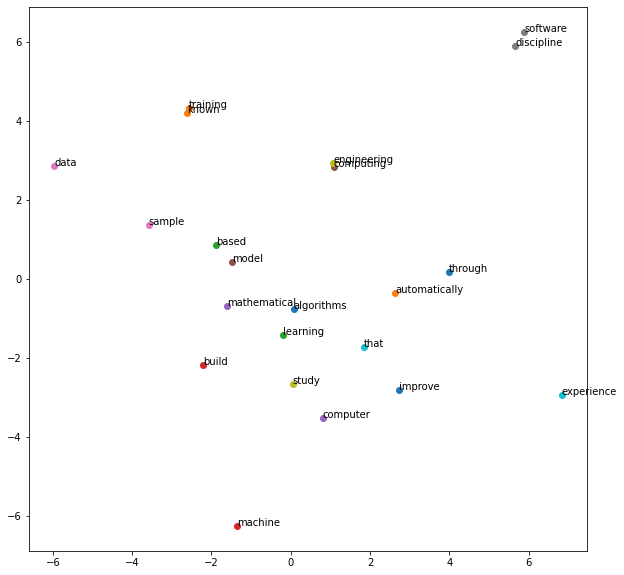

In [237]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
i = 0
for word in list(unique_word_dict1.keys()):
    print(i, ' >> ', word)
    coord = embedding_dict1.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))
    i = i + 1


0  >>  algorithms
1  >>  automatically
2  >>  based
3  >>  build
4  >>  computer
5  >>  computing
6  >>  data
7  >>  discipline
8  >>  engineering
9  >>  experience
10  >>  improve
11  >>  known
12  >>  learning
13  >>  machine
14  >>  mathematical
15  >>  model
16  >>  sample
17  >>  software
18  >>  study
19  >>  that
20  >>  through
21  >>  training


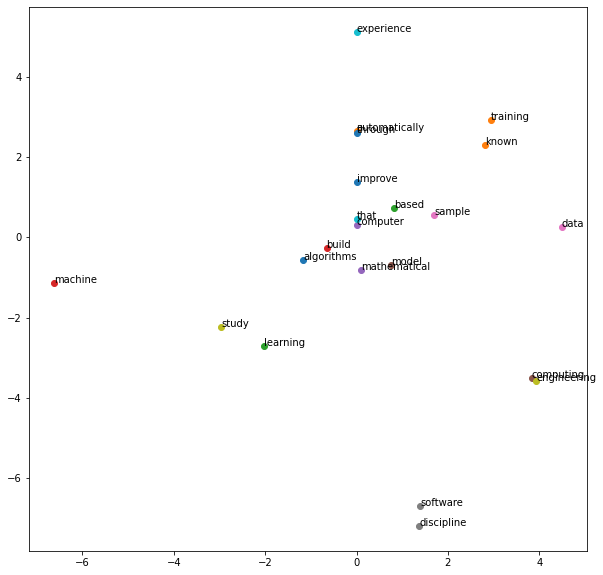

In [238]:
# The input layer
weights = model.get_weights()[0]
# weights[: , 0] = 0
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
i = 0
for word in list(unique_word_dict1.keys()):
    print(i, ' >> ', word)
    # coord = embedding_dict.get(word)
    coord = embedding_dict1.get(word)
    if weights[i][0] < 0 and weights[i][1] > 0:
        plt.scatter(0, weights[i][1])
        plt.annotate(word, (0, weights[i][1]))
    else:
        plt.scatter(weights[i][0], weights[i][1])
        plt.annotate(word, (weights[i][0], weights[i][1]))

        #plt.xlim(-0.5, 0.5)
        #plt.ylim(-0.5, 0.5)
        #plt.show()
    i = i + 1

In [239]:
texts = pd.read_csv('aa.csv')
texts = [x for x in texts['text']]
print (len(texts))
print (texts)

3
["'Machine learning is the study of computer algorithms that improve automatically through experience.\\", 'Machine learning algorithms build a mathematical model based on sample data, known as training data.\\', "Software engineering is a computing discipline.',"]


In [240]:
# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []
for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)
    # print (text)

    # Appending to the all text list
    all_text += text

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text):
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])


In [241]:
word_lists

[['machine', 'learning'],
 ['machine', 'study'],
 ['learning', 'study'],
 ['learning', 'machine'],
 ['learning', 'computer'],
 ['study', 'computer'],
 ['study', 'learning'],
 ['study', 'algorithms'],
 ['study', 'machine'],
 ['computer', 'algorithms'],
 ['computer', 'study'],
 ['computer', 'that'],
 ['computer', 'learning'],
 ['algorithms', 'that'],
 ['algorithms', 'computer'],
 ['algorithms', 'improve'],
 ['algorithms', 'study'],
 ['that', 'improve'],
 ['that', 'algorithms'],
 ['that', 'automatically'],
 ['that', 'computer'],
 ['improve', 'automatically'],
 ['improve', 'that'],
 ['improve', 'through'],
 ['improve', 'algorithms'],
 ['automatically', 'through'],
 ['automatically', 'improve'],
 ['automatically', 'experience'],
 ['automatically', 'that'],
 ['through', 'experience'],
 ['through', 'automatically'],
 ['through', 'improve'],
 ['experience', 'through'],
 ['experience', 'automatically'],
 ['machine', 'learning'],
 ['machine', 'algorithms'],
 ['learning', 'algorithms'],
 ['learni

In [242]:
unique_word_dict2 = create_unique_word_dict(all_text)
# Defining the number of features (unique words)
n_words = len(unique_word_dict2)
print(unique_word_dict2)

{'algorithms': 0, 'automatically': 1, 'based': 2, 'build': 3, 'computer': 4, 'computing': 5, 'data': 6, 'discipline': 7, 'engineering': 8, 'experience': 9, 'improve': 10, 'known': 11, 'learning': 12, 'machine': 13, 'mathematical': 14, 'model': 15, 'sample': 16, 'software': 17, 'study': 18, 'that': 19, 'through': 20, 'training': 21}


In [243]:
# Getting all the unique words
words = list(unique_word_dict2.keys())
print(words)

['algorithms', 'automatically', 'based', 'build', 'computer', 'computing', 'data', 'discipline', 'engineering', 'experience', 'improve', 'known', 'learning', 'machine', 'mathematical', 'model', 'sample', 'software', 'study', 'that', 'through', 'training']


In [244]:
# Creating the X and Y matrices using one hot encoding
print(n_words)

22


In [245]:
X = []
Y = []
for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    print(word_list)
    main_word_index = unique_word_dict2.get(word_list[0])
    context_word_index = unique_word_dict2.get(word_list[1])
    # print (word_list)
    print(word_list[0], main_word_index)
    print(word_list[1], context_word_index)

    # Creating the placeholders
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

86it [00:00, 28650.53it/s]

['machine', 'learning']
machine 13
learning 12
['machine', 'study']
machine 13
study 18
['learning', 'study']
learning 12
study 18
['learning', 'machine']
learning 12
machine 13
['learning', 'computer']
learning 12
computer 4
['study', 'computer']
study 18
computer 4
['study', 'learning']
study 18
learning 12
['study', 'algorithms']
study 18
algorithms 0
['study', 'machine']
study 18
machine 13
['computer', 'algorithms']
computer 4
algorithms 0
['computer', 'study']
computer 4
study 18
['computer', 'that']
computer 4
that 19
['computer', 'learning']
computer 4
learning 12
['algorithms', 'that']
algorithms 0
that 19
['algorithms', 'computer']
algorithms 0
computer 4
['algorithms', 'improve']
algorithms 0
improve 10
['algorithms', 'study']
algorithms 0
study 18
['that', 'improve']
that 19
improve 10
['that', 'algorithms']
that 19
algorithms 0
['that', 'automatically']
that 19
automatically 1
['that', 'computer']
that 19
computer 4
['improve', 'automatically']
improve 10
automatically 1
[

In [246]:
# Converting the matrices into a sparse format because the vast majority of the data are 0s
print(X)
print(Y)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [247]:
import tensorflow as tf

# X= sparse.csr_matrix(X)
# Y = sparse.csr_matrix(Y)
# print (X)
# print(X[0, :].toarray())
# print (X.todense())
# a = X.todense()
# print (a[0])
XX = tf.convert_to_tensor(X, dtype=tf.float32)
YY = tf.convert_to_tensor(Y, dtype=tf.float32)
print(XX.shape)
print(YY.shape)

(86, 22)
(86, 22)


In [248]:
model = CreateModel()
# Optimizing the network weights
model.fit(
    x=XX,
    y=YY,
    batch_size=10,
    epochs=2000
)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 22)]              0         
                                                                 
 dense_20 (Dense)            (None, 2)                 46        
                                                                 
 dense_21 (Dense)            (None, 22)                66        
                                                                 
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
9/9 [==============================] - 0s 2ms/step - loss: 3.0817
Epoch 2/2000
9/9 [==============================] - 0s 2ms/step - loss: 3.0786
Epoch 3/2000
9/9 [==============================] - 0s 2ms/step - loss: 3.0764
Epoch 4/2000
9/9 [==============================] - 0s 269us/step - loss: 3.0742
Epoch 

9/9 [==============================] - 0s 3ms/step - loss: 2.8626
Epoch 94/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.8595
Epoch 95/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.8568
Epoch 96/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.8538
Epoch 97/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.8510
Epoch 98/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.8480
Epoch 99/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.8452
Epoch 100/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.8423
Epoch 101/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.8394
Epoch 102/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.8364
Epoch 103/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.8335
Epoch 104/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.8307
Epoch 105/2000
9/9 [=============================

9/9 [==============================] - 0s 3ms/step - loss: 2.5627
Epoch 195/2000
9/9 [==============================] - 0s 888us/step - loss: 2.5600
Epoch 196/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.5572
Epoch 197/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.5544
Epoch 198/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.5517
Epoch 199/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.5489
Epoch 200/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.5461
Epoch 201/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.5437
Epoch 202/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.5408
Epoch 203/2000
9/9 [==============================] - 0s 3ms/step - loss: 2.5382
Epoch 204/2000
9/9 [==============================] - 0s 640us/step - loss: 2.5355
Epoch 205/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.5331
Epoch 206/2000
9/9 [===================

9/9 [==============================] - 0s 3ms/step - loss: 2.3332
Epoch 296/2000
9/9 [==============================] - 0s 147us/step - loss: 2.3313
Epoch 297/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.3294
Epoch 298/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.3277
Epoch 299/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.3259
Epoch 300/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.3240
Epoch 301/2000
9/9 [==============================] - 0s 1ms/step - loss: 2.3223
Epoch 302/2000
9/9 [==============================] - 0s 4ms/step - loss: 2.3206
Epoch 303/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.3187
Epoch 304/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.3169
Epoch 305/2000
9/9 [==============================] - 0s 556us/step - loss: 2.3152
Epoch 306/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.3135
Epoch 307/2000
9/9 [===================

9/9 [==============================] - 0s 2ms/step - loss: 2.1788
Epoch 397/2000
9/9 [==============================] - 0s 601us/step - loss: 2.1777
Epoch 398/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.1764
Epoch 399/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.1750
Epoch 400/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.1737
Epoch 401/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.1724
Epoch 402/2000
9/9 [==============================] - 0s 429us/step - loss: 2.1712
Epoch 403/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.1698
Epoch 404/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.1686
Epoch 405/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.1673
Epoch 406/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.1659
Epoch 407/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.1647
Epoch 408/2000
9/9 [===================

9/9 [==============================] - 0s 0s/step - loss: 2.0570
Epoch 498/2000
9/9 [==============================] - 0s 0s/step - loss: 2.0560
Epoch 499/2000
9/9 [==============================] - 0s 0s/step - loss: 2.0547
Epoch 500/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0536
Epoch 501/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0527
Epoch 502/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0514
Epoch 503/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0504
Epoch 504/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0490
Epoch 505/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0481
Epoch 506/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0472
Epoch 507/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0459
Epoch 508/2000
9/9 [==============================] - 0s 2ms/step - loss: 2.0451
Epoch 509/2000
9/9 [==========================

9/9 [==============================] - 0s 2ms/step - loss: 1.9568
Epoch 599/2000
9/9 [==============================] - 0s 459us/step - loss: 1.9560
Epoch 600/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9553
Epoch 601/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9543
Epoch 602/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9535
Epoch 603/2000
9/9 [==============================] - 0s 245us/step - loss: 1.9528
Epoch 604/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9519
Epoch 605/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9509
Epoch 606/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9503
Epoch 607/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9493
Epoch 608/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.9485
Epoch 609/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.9476
Epoch 610/2000
9/9 [===================

9/9 [==============================] - 0s 2ms/step - loss: 1.8857
Epoch 700/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8853
Epoch 701/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8846
Epoch 702/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8838
Epoch 703/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8834
Epoch 704/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8828
Epoch 705/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8822
Epoch 706/2000
9/9 [==============================] - 0s 707us/step - loss: 1.8816
Epoch 707/2000
9/9 [==============================] - 0s 0s/step - loss: 1.8813
Epoch 708/2000
9/9 [==============================] - 0s 474us/step - loss: 1.8805
Epoch 709/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8802
Epoch 710/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8795
Epoch 711/2000
9/9 [====================

9/9 [==============================] - 0s 458us/step - loss: 1.8383
Epoch 801/2000
9/9 [==============================] - 0s 312us/step - loss: 1.8381
Epoch 802/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8378
Epoch 803/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8373
Epoch 804/2000
9/9 [==============================] - 0s 441us/step - loss: 1.8369
Epoch 805/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8364
Epoch 806/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8362
Epoch 807/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8357
Epoch 808/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8353
Epoch 809/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.8349
Epoch 810/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8347
Epoch 811/2000
9/9 [==============================] - 0s 0s/step - loss: 1.8342
Epoch 812/2000
9/9 [==================

9/9 [==============================] - 0s 1ms/step - loss: 1.8052
Epoch 902/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8049
Epoch 903/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8047
Epoch 904/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8041
Epoch 905/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8041
Epoch 906/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8036
Epoch 907/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8034
Epoch 908/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8033
Epoch 909/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8028
Epoch 910/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8028
Epoch 911/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8022
Epoch 912/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.8022
Epoch 913/2000
9/9 [=======================

9/9 [==============================] - 0s 2ms/step - loss: 1.7796
Epoch 1003/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7793
Epoch 1004/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7797
Epoch 1005/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7792
Epoch 1006/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7786
Epoch 1007/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7788
Epoch 1008/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7784
Epoch 1009/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7777
Epoch 1010/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7780
Epoch 1011/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7777
Epoch 1012/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7773
Epoch 1013/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7772
Epoch 1014/2000
9/9 [===========

9/9 [==============================] - 0s 63us/step - loss: 1.7587
Epoch 1103/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7585
Epoch 1104/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7583
Epoch 1105/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7581
Epoch 1106/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7580
Epoch 1107/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7576
Epoch 1108/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7574
Epoch 1109/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7572
Epoch 1110/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7569
Epoch 1111/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7570
Epoch 1112/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7567
Epoch 1113/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7564
Epoch 1114/2000
9/9 [==========

9/9 [==============================] - 0s 2ms/step - loss: 1.7399
Epoch 1203/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7400
Epoch 1204/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7396
Epoch 1205/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7396
Epoch 1206/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7393
Epoch 1207/2000
9/9 [==============================] - 0s 0s/step - loss: 1.7392
Epoch 1208/2000
9/9 [==============================] - 0s 0s/step - loss: 1.7392
Epoch 1209/2000
9/9 [==============================] - 0s 0s/step - loss: 1.7388
Epoch 1210/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7387
Epoch 1211/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7388
Epoch 1212/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7384
Epoch 1213/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7383
Epoch 1214/2000
9/9 [==============

9/9 [==============================] - 0s 2ms/step - loss: 1.7231
Epoch 1303/2000
9/9 [==============================] - 0s 542us/step - loss: 1.7230
Epoch 1304/2000
9/9 [==============================] - 0s 0s/step - loss: 1.7230
Epoch 1305/2000
9/9 [==============================] - 0s 0s/step - loss: 1.7224
Epoch 1306/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.7223
Epoch 1307/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7221
Epoch 1308/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7221
Epoch 1309/2000
9/9 [==============================] - 0s 0s/step - loss: 1.7218
Epoch 1310/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7219
Epoch 1311/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7215
Epoch 1312/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7215
Epoch 1313/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7212
Epoch 1314/2000
9/9 [============

9/9 [==============================] - 0s 2ms/step - loss: 1.7078
Epoch 1403/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7076
Epoch 1404/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7074
Epoch 1405/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7075
Epoch 1406/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7071
Epoch 1407/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7070
Epoch 1408/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7070
Epoch 1409/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7070
Epoch 1410/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.7064
Epoch 1411/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.7063
Epoch 1412/2000
9/9 [==============================] - 0s 768us/step - loss: 1.7060
Epoch 1413/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.7061
Epoch 1414/2000
9/9 [=========

9/9 [==============================] - 0s 4ms/step - loss: 1.6946
Epoch 1503/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6944
Epoch 1504/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.6941
Epoch 1505/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.6940
Epoch 1506/2000
9/9 [==============================] - 0s 527us/step - loss: 1.6938
Epoch 1507/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6941
Epoch 1508/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6933
Epoch 1509/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6933
Epoch 1510/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6932
Epoch 1511/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6929
Epoch 1512/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6928
Epoch 1513/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6929
Epoch 1514/2000
9/9 [=========

9/9 [==============================] - 0s 2ms/step - loss: 1.6827
Epoch 1602/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6828
Epoch 1603/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6825
Epoch 1604/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.6822
Epoch 1605/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.6821
Epoch 1606/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6822
Epoch 1607/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6818
Epoch 1608/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6818
Epoch 1609/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.6817
Epoch 1610/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6819
Epoch 1611/2000
9/9 [==============================] - 0s 782us/step - loss: 1.6816
Epoch 1612/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6814
Epoch 1613/2000
9/9 [=========

Epoch 1701/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6724
Epoch 1702/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6722
Epoch 1703/2000
9/9 [==============================] - 0s 4ms/step - loss: 1.6722
Epoch 1704/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6720
Epoch 1705/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6721
Epoch 1706/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6720
Epoch 1707/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6718
Epoch 1708/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6716
Epoch 1709/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6716
Epoch 1710/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6715
Epoch 1711/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6713
Epoch 1712/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6712
Epoch 1713/2000


9/9 [==============================] - 0s 2ms/step - loss: 1.6636
Epoch 1801/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6635
Epoch 1802/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6633
Epoch 1803/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6635
Epoch 1804/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6631
Epoch 1805/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6634
Epoch 1806/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6629
Epoch 1807/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6631
Epoch 1808/2000
9/9 [==============================] - 0s 3ms/step - loss: 1.6630
Epoch 1809/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6629
Epoch 1810/2000
9/9 [==============================] - 0s 510us/step - loss: 1.6628
Epoch 1811/2000
9/9 [==============================] - 0s 980us/step - loss: 1.6627
Epoch 1812/2000
9/9 [=======

9/9 [==============================] - 0s 2ms/step - loss: 1.6564
Epoch 1901/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6564
Epoch 1902/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6558
Epoch 1903/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6556
Epoch 1904/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6557
Epoch 1905/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6554
Epoch 1906/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6554
Epoch 1907/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6551
Epoch 1908/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6554
Epoch 1909/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6554
Epoch 1910/2000
9/9 [==============================] - 0s 0s/step - loss: 1.6553
Epoch 1911/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6553
Epoch 1912/2000
9/9 [============

9/9 [==============================] - 0s 2ms/step - loss: 1.6497
Epoch 2000/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.6494


In [249]:
# The input layer

weights2 = model.get_weights()[0] #21*2
print(weights2.shape)
print(weights2[1][1])
print(weights2)

# weights = model.get_weights()[2]
# print (weights)

(22, 2)
-2.392881
[[-0.70147973 -0.6605116 ]
 [ 1.308157   -2.392881  ]
 [-1.9740666   2.374674  ]
 [-3.862246   -0.14003998]
 [-1.3953294  -5.0414023 ]
 [ 3.2440805   1.6894871 ]
 [ 1.1620117   4.4239182 ]
 [ 6.4385085  -0.4417449 ]
 [ 3.0844252   1.5384759 ]
 [ 2.935008   -7.0390887 ]
 [ 0.09693501 -5.9008493 ]
 [-0.5284069   6.076757  ]
 [-1.398776   -0.848875  ]
 [-3.7794354  -5.2406116 ]
 [-0.7936351   0.33281603]
 [-0.5786091   1.0076859 ]
 [-0.8555961   2.5851665 ]
 [ 6.5115614  -0.44131953]
 [-2.1704845  -1.5205021 ]
 [ 0.18100959 -2.094968  ]
 [ 2.231378   -2.2925158 ]
 [-0.9640394   6.6431956 ]]


In [250]:
#get the weight for each unique word
embedding_dict2 = {}
for word in words: #to pick the a row of weight of two values for each unique word since weights = 21*2
    embedding_dict2.update({
        word: weights[unique_word_dict2.get(word)]
    })

print(embedding_dict2)

{'algorithms': array([-1.160987 , -0.5628834], dtype=float32), 'automatically': array([-3.2992582,  2.6495116], dtype=float32), 'based': array([0.81799644, 0.74054104], dtype=float32), 'build': array([-0.65424037, -0.2708986 ], dtype=float32), 'computer': array([-5.550988  ,  0.32306275], dtype=float32), 'computing': array([ 3.8365304, -3.4975193], dtype=float32), 'data': array([4.4890046, 0.270392 ], dtype=float32), 'discipline': array([ 1.3788381, -7.192773 ], dtype=float32), 'engineering': array([ 3.9364169, -3.5809927], dtype=float32), 'experience': array([-1.5570499,  5.123897 ], dtype=float32), 'improve': array([-2.3294997,  1.3900964], dtype=float32), 'known': array([2.8168101, 2.3059137], dtype=float32), 'learning': array([-2.0220723, -2.7099576], dtype=float32), 'machine': array([-6.614501 , -1.1436121], dtype=float32), 'mathematical': array([ 0.10618064, -0.82226145], dtype=float32), 'model': array([ 0.7639516, -0.6823959], dtype=float32), 'sample': array([1.6991612, 0.555633

0  >>  algorithms
1  >>  automatically
2  >>  based
3  >>  build
4  >>  computer
5  >>  computing
6  >>  data
7  >>  discipline
8  >>  engineering
9  >>  experience
10  >>  improve
11  >>  known
12  >>  learning
13  >>  machine
14  >>  mathematical
15  >>  model
16  >>  sample
17  >>  software
18  >>  study
19  >>  that
20  >>  through
21  >>  training


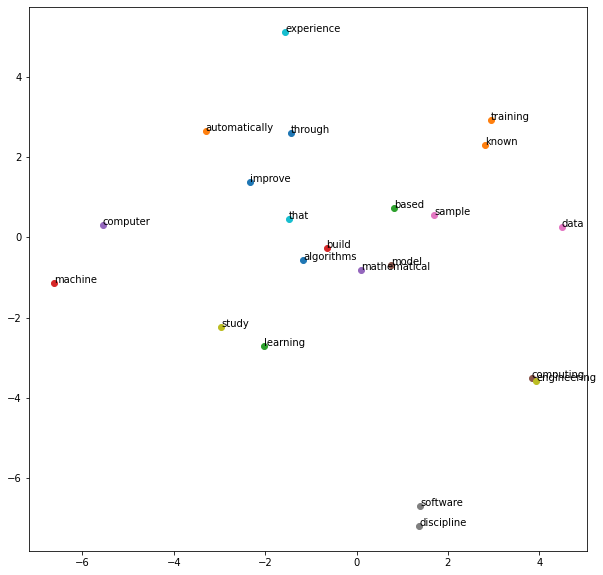

In [251]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
i = 0
for word in list(unique_word_dict2.keys()):
    print(i, ' >> ', word)
    coord = embedding_dict2.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))
    i = i + 1

0  >>  algorithms
1  >>  automatically
2  >>  based
3  >>  build
4  >>  computer
5  >>  computing
6  >>  data
7  >>  discipline
8  >>  engineering
9  >>  experience
10  >>  improve
11  >>  known
12  >>  learning
13  >>  machine
14  >>  mathematical
15  >>  model
16  >>  sample
17  >>  software
18  >>  study
19  >>  that
20  >>  through
21  >>  training


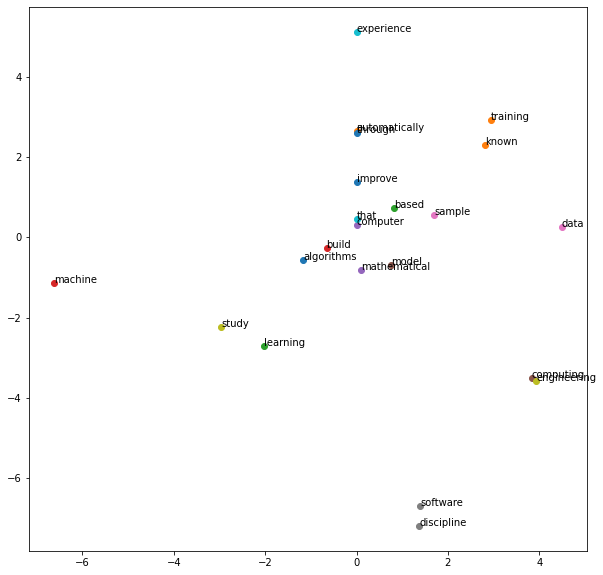

In [252]:
# The input layer
weights2 = model.get_weights()[0]
# weights[: , 0] = 0
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
i = 0
for word in list(unique_word_dict2.keys()):
    print(i, ' >> ', word)
    # coord = embedding_dict.get(word)
    coord = embedding_dict2.get(word)
    if weights[i][0] < 0 and weights[i][1] > 0:
        plt.scatter(0, weights[i][1])
        plt.annotate(word, (0, weights[i][1]))
    else:
        plt.scatter(weights[i][0], weights[i][1])
        plt.annotate(word, (weights[i][0], weights[i][1]))

        #plt.xlim(-0.5, 0.5)
        #plt.ylim(-0.5, 0.5)
        #plt.show()
    i = i + 1

In [253]:
from scipy.spatial import distance
distances = []
Min = []
for i in embedding_dict1:
    for j in embedding_dict2:
        distances.append(distance.euclidean(embedding_dict1[i],embedding_dict2[j]))
    Min.append(min(distances))
    distances = []

In [254]:
Min

[0.05410586670041084,
 1.3173390626907349,
 0.5649858117103577,
 0.557534396648407,
 2.7986738681793213,
 1.8091450929641724,
 2.572890520095825,
 4.015491485595703,
 1.8488539457321167,
 2.959155321121216,
 1.296891212463379,
 1.4072177410125732,
 0.669959306716919,
 2.7687480449676514,
 0.4753555953502655,
 0.027311719954013824,
 1.2505420446395874,
 4.4341721534729,
 1.8492833375930786,
 1.505900502204895,
 0.5129445791244507,
 1.288472056388855]

In [255]:
print(len(Min))

22


In [256]:
from sklearn import preprocessing
normalized_arr = preprocessing.normalize([Min])
normalized_arr

array([[0.00572772, 0.1394552 , 0.05981012, 0.0590213 , 0.2962712 ,
        0.19151841, 0.27236948, 0.42508506, 0.19572204, 0.31325997,
        0.13729056, 0.14896987, 0.07092275, 0.29310321, 0.05032175,
        0.00289125, 0.13238398, 0.46940714, 0.1957675 , 0.15941655,
        0.05430097, 0.1363993 ]])

In [257]:
Mean = np.mean(normalized_arr)
Mean

0.1731552427557613

In [258]:
sim  = 1-Mean
print(sim*100)

82.68447572442386


In [259]:
import numpy as geek
import numpy as np
from numpy.linalg import norm
cosine_ = []
Max = []
for i in embedding_dict1:
    for j in embedding_dict2:
        cosine = np.dot(embedding_dict1[i],embedding_dict2[j])/(norm(embedding_dict1[i])*(norm(embedding_dict2[j])))
        cosine_.append(cosine)
    Max.append(max(cosine_))
    cosine_ = []

In [260]:
Max

[0.99952614,
 0.98001564,
 0.99309504,
 0.9908629,
 0.999812,
 0.9129917,
 0.99591225,
 0.9997979,
 0.9070716,
 0.9489652,
 0.998158,
 0.99853057,
 0.9666119,
 0.94275963,
 0.9998765,
 0.99984604,
 0.99786824,
 0.9995253,
 0.9938093,
 0.9998942,
 0.99983543,
 0.9994711]

In [261]:
from sklearn import preprocessing
normalized_arr1 = preprocessing.normalize([Max])
normalized_arr1

array([[0.21671413, 0.21248392, 0.21531976, 0.21483579, 0.21677611,
        0.197952  , 0.21593057, 0.21677304, 0.19666842, 0.20575166,
        0.21641749, 0.21649827, 0.20957777, 0.20440619, 0.21679009,
        0.21678349, 0.21635467, 0.21671395, 0.21547462, 0.21679393,
        0.21678119, 0.2167022 ]])

In [262]:
Mean1 = np.mean(normalized_arr)
Mean1

0.1731552427557613

In [263]:
sim  = 1-Mean1
print(sim*100)

82.68447572442386
